# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Python For BigData @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## TensorFlow 2.0
>  
> - [TF2.x에서 TF1.x버전 코드 실행 및 자동 변환 스크립트    ][tf2_31]
> - [TF2의 주요기능 (TF와 Keras의 장점 결합)                ][tf2_38]

[tf2_31]: https://lv99.tistory.com/31 "Go tf2_31"
[tf2_38]: https://lv99.tistory.com/38 "Go tf2_38"


In [2]:
from images import bigpycraft_tf2 as TF2
from IPython.display import Image

## TensorFlow 2.0의 주요기능
>  (TensorFlow와 Keras의 장점 결합)
> - TF 2.0은 custom을 하기에 좋은 TensorFlow의 장점과 쉽게 구현 및 연산이 가능한 Keras의 장점을 결합하고, 분산처리에 관한 것을 추가한 정도가 아닐까 합니다. 
> - 실제로 TensorFlow 1.10부터는 keras를 내장하기 시작했고, Keras 2.3부터는 TF2.0과 서로 sync를 맞추고 있습니다. 
> - Keras의 창시자 브랑수아 숄레님도 tf 2.0 개발에 참여하시며 native keras보다는 tf.keras를 사용할 것을 추천하십니다

### <font color='brown'>TF2 주요 기능</font>
<hr>
<font color='brown'>
<ol>
<li>Eager execution - 즉시 실행</li>
<li>Automatic differentiation - GradientTape</li>
<li>Subclassing - 새로운 모델 생성 방법</li>
<li>MirroredStraegy - multi-GPU와 동기 분산 학습 지원</li>
</ol>
</font>

Tensorflow 2.0 ecosystem


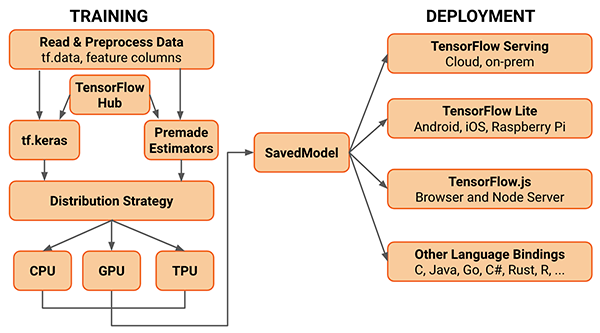

In [6]:
print("Tensorflow 2.0 ecosystem")
Image(TF2.IMG_02)

### <font color='brown'>사용법</font>
> - <font color='green'>from tensorflow.keras import ...</font>
> - [Tf_upgrade_v2 스크립트    ](https://www.tensorflow.org/guide/upgrade?hl=ko)

### 1. Eager execution - 즉시 실행
> 
> - Eager execution은 더 파이썬적인(Pythonic) 방식으로 전체 그래프를 생성하지 않고 함수를 바로 실행하는 명령형 프로그래밍 환경입니다. 동적으로 계산 그래프를 작동하는 방식입니다. 
> - Session 객체를 생성하는 것과 전체 모델 그래프 빌드를 요구하는 것이 이전의 단점이어서, eager execution이 소개되었습니다.
> - Eager execution의 장점은 전체 모델이 빌드되어있을 필요가 없다는 것입니다. 따라서 즉시 operation이 evaluate되는 것 대신에, 모델을 빌딩하는 것을 시작하기 쉽습니다. 그래서 디버깅하기도 좋습니다.
> - 하지만 단점이 역시 존재합니다! multi GPU를 위한 분산 strategy를 위해서는 disable해주어야 합니다.
</br></br>
> - TensorFlow 2.0 에서 multi GPU 사용하기 - [**텐서플로우 문제 해결**](https://lv99.tistory.com/12)
</br></br>
> - 코드 차원에서의 변화 : keras처럼 된 것으로 보입니다. Session 없이, 바로 fit하면 되는! keras의 장점을 가져온 것이죠

In [9]:
import tensorflow as tf

```python
# Before
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
              epochs=10, batch_size=64)

# After
model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
          epochs=10, batch_size=64)

```

### 2. Automatic differentiation - GradientTape
> 
> - custom layers나 loss functions을 다루는데 장점이 있음
> 자동 미분 (Automatic differentiation) : <br/>자동 미분은 인공신경망 훈련을 위한 역전파를 구현하는데 유용
> - tf.GradientTape :
> </br> - 모든 정방향(forward-pass) 연산은 "tape"에 기록
> </br> - tape을 거꾸로 돌려 그래디언트를 계산한 후 tape을 폐기
> </br> - tf.GradientTape에서는 하나의 그래디언트만을 계산할 수 있음


사용예 
<hr>

```python
  model = tf.keras.Sequential([
      tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(units=1, activation='sigmoid')
  ])
 
  loss_func = tf.keras.losses.BinaryCrossentropy()
  optimizer = tf.keras.optimizers.Adam()
 
  def train_loop(features, labels):
      with tf.GradientTape() as tape:
          predictions = model(features)
          loss = loss_func(labels, predictions)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
      return loss
 
  def train_model():
      start = time.time()
      for epoch in range(10):
          for step, (x, y) in enumerate(dataset):
              loss = train_loop(x, y)
              print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
      print("It took {} seconds".format(time.time() - start))
 
  train_model()

```

### 3. Subclassing - 새로운 모델 생성 방법
> keras에서는 2가지 방법으로 모델을 만들 수 있었지만, tf.keras에서는 3가지 방법으로 만들 수 있다.
> - Sequential
> - Function
> - Subclassing


사용예 
<hr>

```python

  class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
      super(ResnetIdentityBlock, self).__init__(name='')
      filters1, filters2, filters3 = filters
 
      self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
      self.bn2a = tf.keras.layers.BatchNormalization()
 
      self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
      self.bn2b = tf.keras.layers.BatchNormalization()
 
      self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
      self.bn2c = tf.keras.layers.BatchNormalization()
 
    def call(self, input_tensor, training=False):
      x = self.conv2a(input_tensor)
      x = self.bn2a(x, training=training)
      x = tf.nn.relu(x)
 
      x = self.conv2b(x)
      x = self.bn2b(x, training=training)
      x = tf.nn.relu(x)
 
      x = self.conv2c(x)
      x = self.bn2c(x, training=training)
 
      x += input_tensor
      return tf.nn.relu(x)

```

<hr>

```python

  block = ResnetIdentityBlock(1, [1, 2, 3])
    print(block(tf.zeros([1, 2, 3, 3])))
    print([x.name for x in block.trainable_variables])

```
<hr>
 
- 최근의 tensorflow 1.x에서 사용하는 방식과 크게 다르지는 않음
- keras에서 부족했던 custmize부분이 많이 보완되어 통합된 것으로 보면 좋을 듯.

### 4. MirroredStraegy - multi-GPU와 동기 분산 학습 지원
> 
> - MirroredStraegy는 한 시스템의 multiGPU 및 동기식 분산 학습을 서포트함
> - MultiWorkerMirroredStrategy는 다중 worker를 이용한 동기 분산 훈련


사용예 
<hr>

```python

  strategy = tf.distribute.MirroredStrategy()
 
  with strategy.scope():
      model = tf.keras.Sequential([
          tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.Dropout(rate=0.2),
          tf.keras.layers.Dense(units=1, activation='sigmoid')
      ])
 
      model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
 
  model.fit(X, y, epochs=5)

```

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>